# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


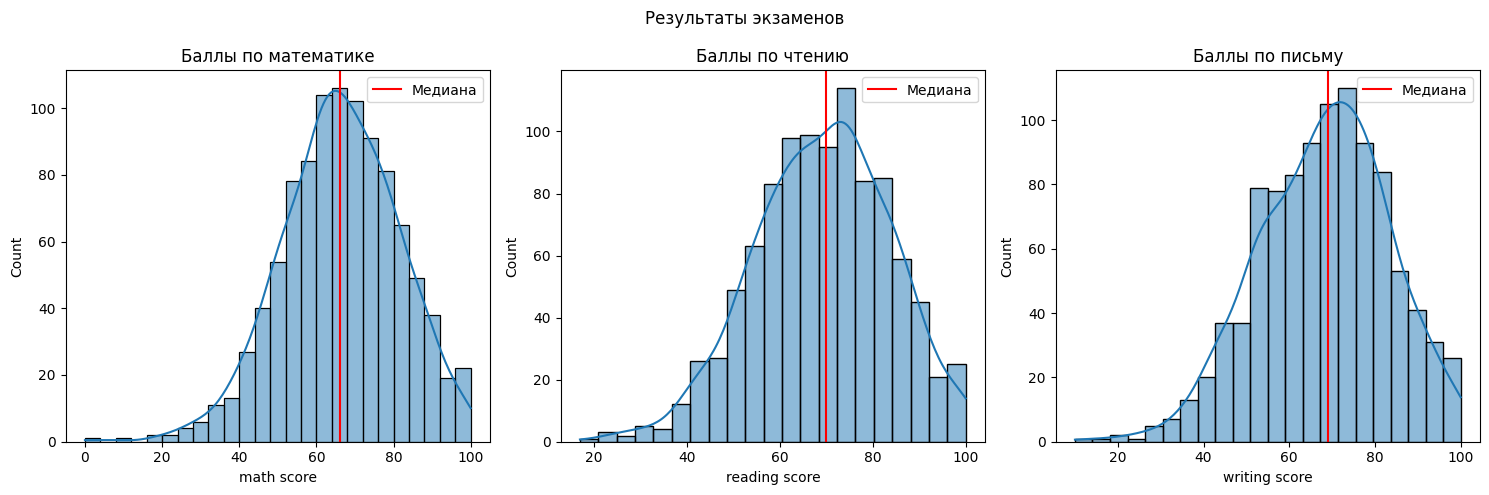

In [13]:

plt.figure(figsize=(15, 5))
plt.suptitle("Результаты экзаменов")


plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('Баллы по математике')
plt.axvline(df['math score'].median(), color='r', linestyle='-', label='Медиана')
plt.legend()


plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True)
plt.title('Баллы по чтению')
plt.axvline(df['reading score'].median(), color='r', linestyle='-', label='Медиана')
plt.legend()


plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True)
plt.title('Баллы по письму')
plt.axvline(df['writing score'].median(), color='r', linestyle='-', label='Медиана')
plt.legend()

plt.tight_layout()
plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


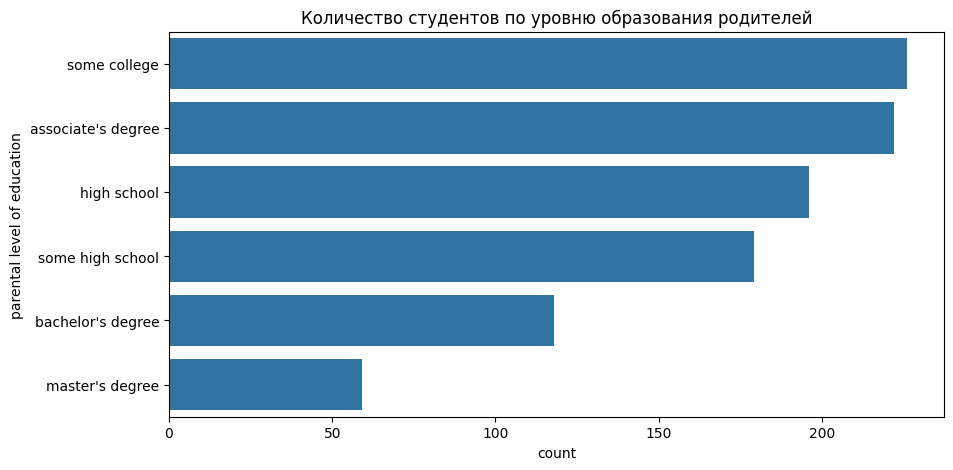

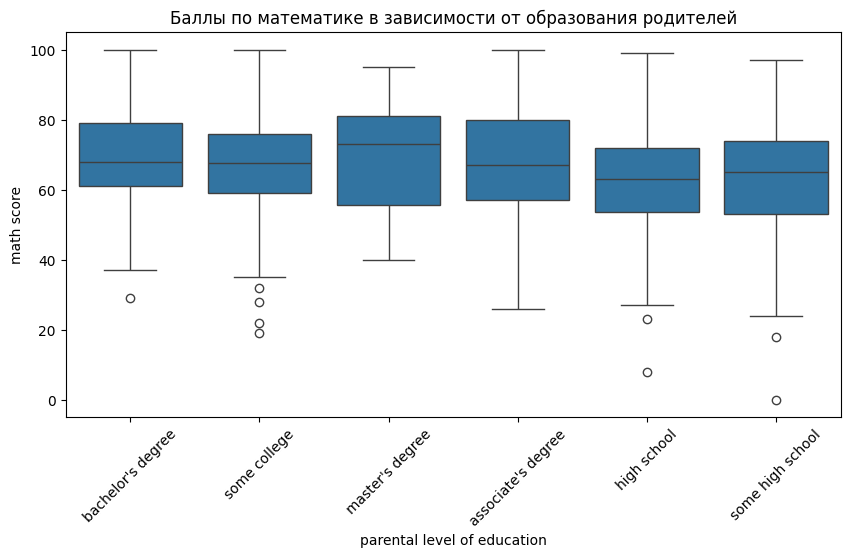

In [16]:

education_counts = df['parental level of education'].value_counts()
print(education_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='parental level of education', order=education_counts.index)
plt.title('Количество студентов по уровню образования родителей')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Баллы по математике в зависимости от образования родителей')
plt.xticks(rotation=45)
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [20]:
num_females_above_90 = df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)].shape[0]

print("Число студенток, набравших больше 90 баллов по всем предметам:", num_females_above_90)

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [6]:
gender_stats = df.groupby('gender').agg({'math score': ['min', 'max', 'median'],'reading score': ['min', 'max', 'median'],'writing score': ['min', 'max', 'median']})
print(gender_stats)

       math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [18]:
lunch_test_stats = df.groupby(['lunch', 'test preparation course']).agg({'math score': 'mean', 'reading score': 'mean','writing score': 'mean'})
print(lunch_test_stats)

                                      math score  reading score  writing score
lunch        test preparation course                                          
free/reduced completed                 63.045802      69.870229      70.351145
             none                      56.508929      61.602679      58.736607
standard     completed                 73.533040      76.215859      76.766520
             none                      68.133971      69.177033      67.595694


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

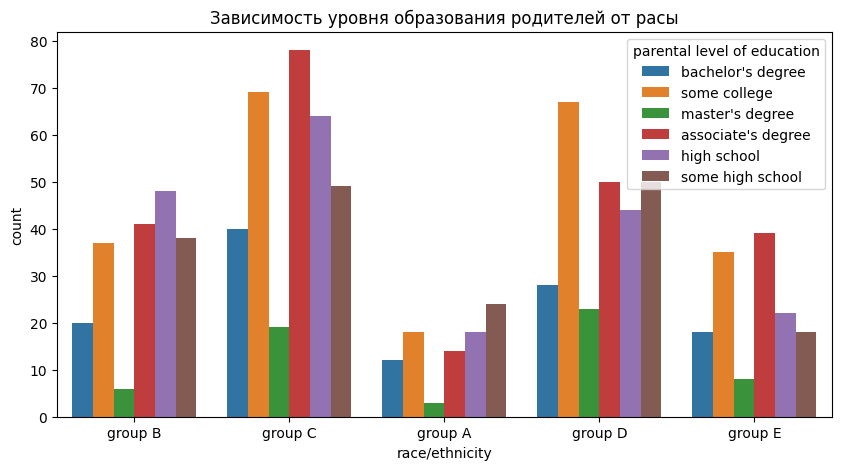

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='race/ethnicity', hue='parental level of education')
plt.title('Зависимость уровня образования родителей от расы')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

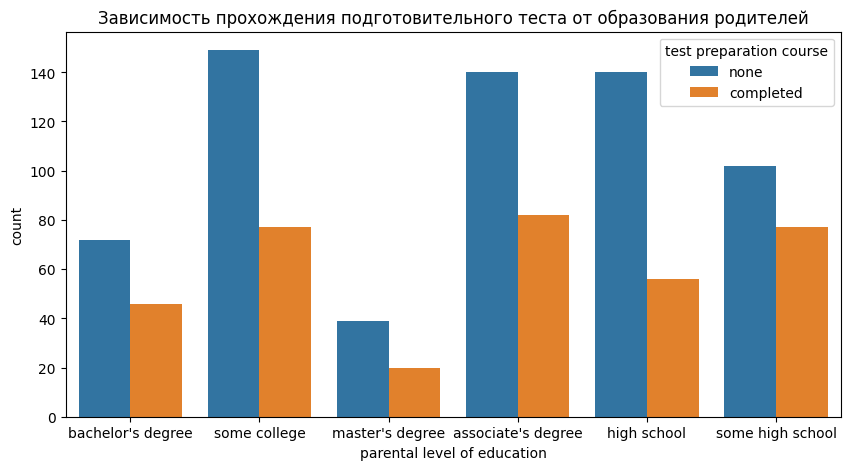

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='parental level of education', hue='test preparation course')
plt.title('Зависимость прохождения подготовительного теста от образования родителей')
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

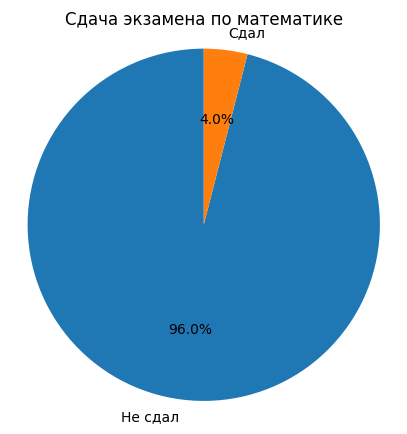

In [24]:
df['math_pass'] = df['math score'] >= 40
pass_counts = df['math_pass'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(pass_counts, labels=['Не сдал', 'Сдал'], autopct='%1.1f%%', startangle=90)
plt.title('Сдача экзамена по математике')
plt.axis('equal')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

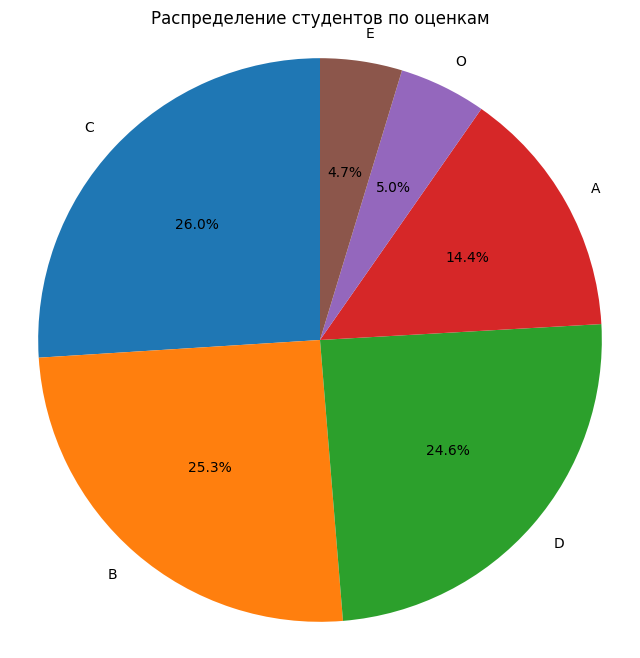

In [25]:

df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average_score'] <= 40:
        return 'E'
    elif row['average_score'] <= 60:
        return 'D'
    elif row['average_score'] <= 70:
        return 'C'
    elif row['average_score'] <= 80:
        return 'B'
    elif row['average_score'] <= 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df.apply(assign_grade, axis=1)

grade_counts = df['grade'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение студентов по оценкам')
plt.axis('equal')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

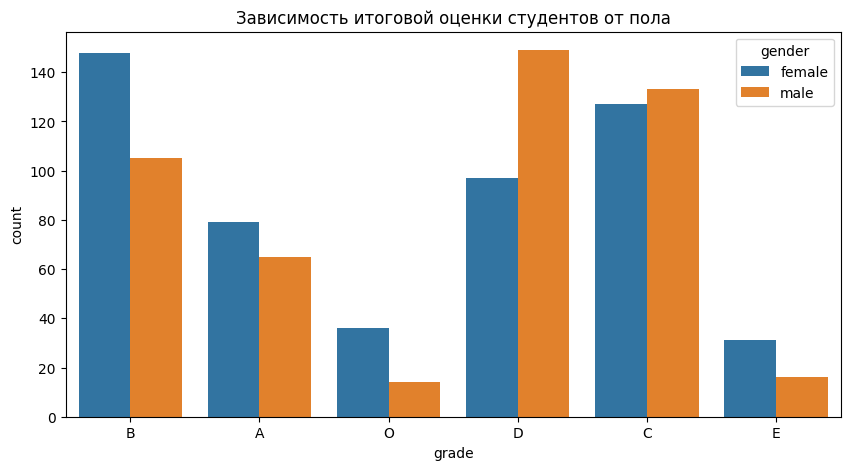

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='grade', hue='gender')
plt.title('Зависимость итоговой оценки студентов от пола')
plt.show()